<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/BasicModels/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Common NLP Tasks with Machine Learning

Natural Language Processing (NLP) is a branch of artificial intelligence that helps computers understand, interpret, and manipulate human language. This notebook demonstrates various common NLP tasks using machine learning techniques.

We'll use practical examples to show how different NLP tasks can be implemented and what insights they can provide.

## Summary

This notebook covers the following NLP tasks:
1. Basic Text Analysis
   - Word frequency
   - Word clouds
   - N-grams analysis
2. Sentiment Analysis
   - Using pre-trained models
   - Training custom classifiers
3. Keyword Extraction
   - TF-IDF based extraction
   - YAKE/RAKE algorithms
4. Topic Modeling
   - LDA (Latent Dirichlet Allocation)
5. Named Entity Recognition (NER)
   - Using spaCy
6. Text Similarity Analysis
   - Cosine similarity
   - Word embeddings

Each section includes explanations, code implementation, and visualizations.

### Dataset Overview

The **IMDB Movie Reviews Dataset** is a widely-used open-source dataset for sentiment analysis tasks. It contains:
- **50,000 Movie Reviews**: Split into 25,000 training and 25,000 testing samples.
- **Binary Sentiment Labels**: Each review is labeled as either positive or negative.

The dataset is available for download [here](https://ai.stanford.edu/~amaas/data/sentiment/).

## Dataset

We're using a movie reviews dataset that contains:
- Movie reviews text
- Sentiment labels (positive/negative)

Preprocessing steps already applied:
- Converted to lowercase
- Removed special characters and punctuation
- Removed stop words
- Tokenization

Let's load our preprocessed data and start the analysis.

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URLs for the datasets
train_url = "https://raw.githubusercontent.com/calmrocks/master-machine-learning-engineer/main/BasicModels/data/processed_train_data.csv"
test_url = "https://raw.githubusercontent.com/calmrocks/master-machine-learning-engineer/main/BasicModels/data/processed_test_data.csv"

# Load both datasets
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

# Display basic information
print("Training Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)

print("\nColumns in training data:", train_df.columns.tolist())

print("\nSample of training data:")
display(train_df.head())

print("\nSample of test data:")
display(test_df.head())

# Basic statistics
print("\nClass distribution in training data:")
print(train_df['sentiment'].value_counts(normalize=True))

Training Dataset Shape: (25000, 3)
Test Dataset Shape: (25000, 3)

Columns in training data: ['review', 'sentiment', 'cleaned_review']

Sample of training data:


,review,sentiment,cleaned_review
0,I rented I AM CURIOUS-YELLOW from my video sto...,negative,rented curiousyellow video store controversy s...
1,"""I Am Curious: Yellow"" is a risible and preten...",negative,curious yellow risible pretentious steaming pi...
2,If only to avoid making this type of film in t...,negative,avoid making type film future film interesting...
3,This film was probably inspired by Godard's Ma...,negative,film probably inspired godards masculin fminin...
4,"Oh, brother...after hearing about this ridicul...",negative,oh brotherafter hearing ridiculous film umptee...



Sample of test data:


,review,sentiment,cleaned_review
0,I love sci-fi and am willing to put up with a ...,negative,love scifi willing put lot scifi moviestv usua...
1,"Worth the entertainment value of a rental, esp...",negative,worth entertainment value rental especially li...
2,its a totally average film with a few semi-alr...,negative,totally average film semialright action sequen...
3,STAR RATING: ***** Saturday Night **** Friday ...,negative,star rating saturday night friday night friday...
4,"First off let me say, If you haven't enjoyed a...",negative,first let say havent enjoyed van damme movie s...



Class distribution in training data:
sentiment
negative    0.5
positive    0.5
Name: proportion, dtype: float64


Our datasets are now loaded and ready for analysis. We have:
- Training data for model development and training
- Test data for final evaluation of our models

In the following sections, we'll use these datasets to demonstrate various NLP tasks, primarily using the training data for analysis and model development, while keeping the test data for final evaluation.

## Data Preprocessing

Before diving into NLP tasks, let's understand how we preprocessed our raw text data. The cleaned reviews are stored in the 'cleaned_review' column.

### Preprocessing Steps:
1. **Text Cleaning**
   - Converting all text to lowercase
   - Removing punctuation and special characters using regex
   - Keeping only alphabetic characters and spaces

2. **Tokenization**
   - Breaking text into individual words/tokens using NLTK's word_tokenize

3. **Stop Words Removal**
   - Removing common English stop words (e.g., 'the', 'is', 'at', 'which')
   - Using NLTK's English stop words list

Here's the preprocessing code we used:

```
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Example of our preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Let's show an example
original_text = train_df['review'].iloc[0]
cleaned_text = train_df['cleaned_review'].iloc[0]

print("Original text:")
print(original_text[:500], "...\n")
print("Cleaned text:")
print(cleaned_text[:500], "...")
```

### Impact of Preprocessing
- Reduced noise in the text data
- Removed irrelevant words and characters
- Standardized text format
- Made text more suitable for machine learning algorithms

The cleaned data will be used for all our subsequent NLP tasks. Each task might require additional specific preprocessing, which we'll discuss in their respective sections.

# NLP Tasks

## 1. Basic Text Analysis

In this section, we'll perform fundamental text analysis to understand our data better:
- Word frequency analysis
- Word cloud visualization
- N-grams analysis
- Basic text statistics

In [2]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to get word frequency
def get_word_freq(text_series):
    words = ' '.join(text_series).split()
    return Counter(words)

# Get word frequencies
word_freq = get_word_freq(train_df['cleaned_review'])

# Display top 20 most common words
print("Most common words:")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

Most common words:
br: 57686
movie: 41812
film: 37460
one: 25509
like: 19642
good: 14556
even: 12506
would: 12135
time: 11790
really: 11664
story: 11457
see: 11223
much: 9584
well: 9377
get: 9212
also: 9075
people: 8951
bad: 8920
great: 8895
first: 8857


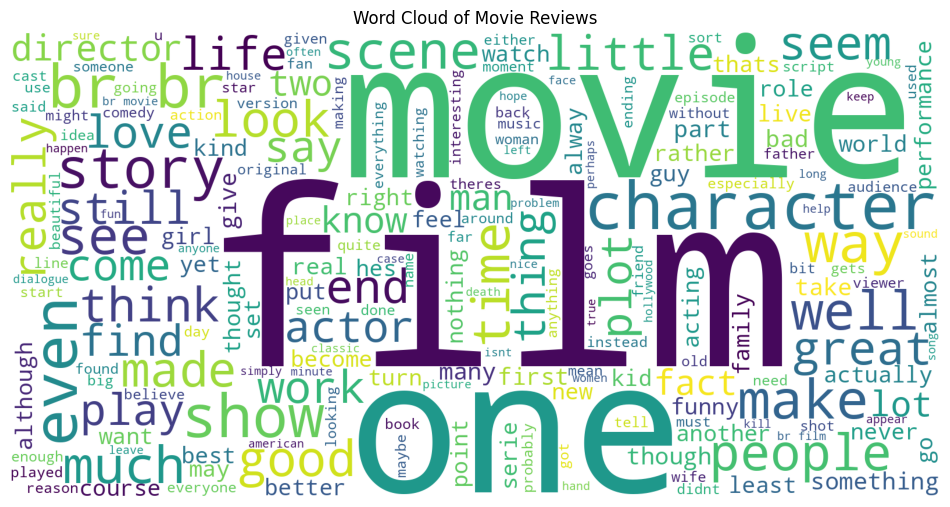

In [3]:
# Create word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(train_df['cleaned_review']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

In [4]:
# N-grams analysis
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def get_top_ngrams(text_series, n, k=10):
    # Use sparse matrix instead of dense array
    vectorizer = CountVectorizer(ngram_range=(n, n), max_features=10000)  # Limit features
    ngrams = vectorizer.fit_transform(text_series)

    # Sum without converting to dense array
    count_values = np.asarray(ngrams.sum(axis=0)).ravel()

    # Get top k indices
    top_indices = count_values.argsort()[-k:][::-1]

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Return top ngrams and their counts
    return [(feature_names[i], count_values[i]) for i in top_indices]

# Take a sample of the data if needed
sample_size = 5000  # Adjust this number based on your memory constraints
sample_reviews = train_df['cleaned_review'].sample(n=sample_size, random_state=42)

print("Top 10 Bigrams (based on sample):")
for ngram, count in get_top_ngrams(sample_reviews, 2):
    print(f"{ngram}: {count}")

print("\nTop 10 Trigrams (based on sample):")
for ngram, count in get_top_ngrams(sample_reviews, 3):
    print(f"{ngram}: {count}")

Top 10 Bigrams (based on sample):
br br: 1400
br film: 268
br movie: 236
ever seen: 222
special effects: 220
ive seen: 214
dont know: 213
even though: 197
itbr br: 189
looks like: 178

Top 10 Trigrams (based on sample):
ive ever seen: 83
worst movie ever: 39
new york city: 34
movie ever seen: 33
one worst movies: 30
dont get wrong: 29
dont waste time: 29
br br movie: 29
br br film: 28
movie ive seen: 26


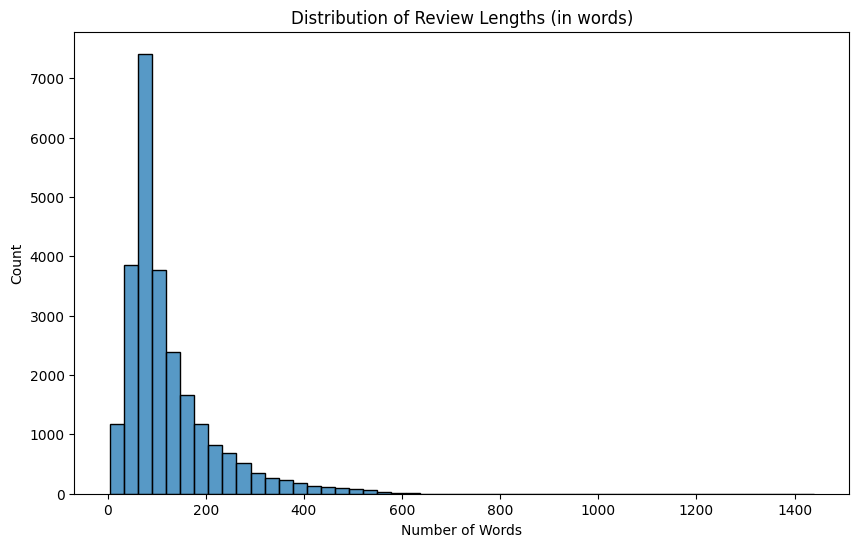


Text Statistics:
Average words per review: 122.93
Median words per review: 91.00
Max words in a review: 1440
Min words in a review: 4


In [5]:
# Basic text statistics
train_df['word_count'] = train_df['cleaned_review'].str.split().str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='word_count', bins=50)
plt.title('Distribution of Review Lengths (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

print("\nText Statistics:")
print(f"Average words per review: {train_df['word_count'].mean():.2f}")
print(f"Median words per review: {train_df['word_count'].median():.2f}")
print(f"Max words in a review: {train_df['word_count'].max()}")
print(f"Min words in a review: {train_df['word_count'].min()}")

## Sentiment Analysis

Sentiment analysis is the process of determining the emotional tone behind text. For our movie reviews dataset, we'll explore different approaches to analyze sentiment:

### Approach 1: Rule-based Sentiment Analysis
First, let's use TextBlob, a simple rule-based approach that assigns polarity scores to text.

In [6]:
from textblob import TextBlob

# Function to get TextBlob sentiment
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply to a sample of reviews
sample_reviews = train_df['cleaned_review'].head(5)
for review in sample_reviews:
    sentiment = get_textblob_sentiment(review)
    print(f"Sentiment Score: {sentiment:.2f}")
    print(f"Text: {review[:100]}...\n")

Sentiment Score: 0.16
Text: rented curiousyellow video store controversy surrounded first released also heard first seized us cu...

Sentiment Score: -0.08
Text: curious yellow risible pretentious steaming pile doesnt matter ones political views film hardly take...

Sentiment Score: 0.26
Text: avoid making type film future film interesting experiment tells cogent storybr br one might feel vir...

Sentiment Score: -0.01
Text: film probably inspired godards masculin fminin urge see film insteadbr br film two strong elements r...

Sentiment Score: -0.10
Text: oh brotherafter hearing ridiculous film umpteen years think old peggy lee songbr br early teen smoke...



### Approach 2: Machine Learning Based Classification
Now, let's build a simple machine learning classifier using TF-IDF features and logistic regression.

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.88      0.88     12500
    positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



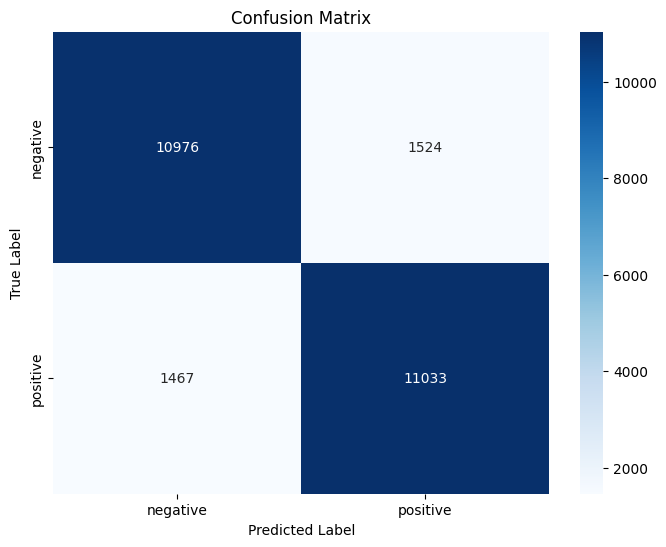


Analyzing sample reviews:

True Sentiment: negative
Predicted Sentiment: negative
Confidence: 0.59
Text: rented curiousyellow video store controversy surrounded first released also heard first seized us cu...


True Sentiment: negative
Predicted Sentiment: negative
Confidence: 0.89
Text: curious yellow risible pretentious steaming pile doesnt matter ones political views film hardly take...


True Sentiment: negative
Predicted Sentiment: negative
Confidence: 0.86
Text: avoid making type film future film interesting experiment tells cogent storybr br one might feel vir...


True Sentiment: negative
Predicted Sentiment: negative
Confidence: 0.69
Text: film probably inspired godards masculin fminin urge see film insteadbr br film two strong elements r...


True Sentiment: negative
Predicted Sentiment: negative
Confidence: 0.92
Text: oh brotherafter hearing ridiculous film umpteen years think old peggy lee songbr br early teen smoke...



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Convert string labels to numeric values
le = LabelEncoder()
train_labels = le.fit_transform(train_df['sentiment'])
test_labels = le.transform(test_df['sentiment'])

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df['cleaned_review'])
X_test = tfidf.transform(test_df['cleaned_review'])

# Train logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, train_labels)

# Make predictions
y_pred = lr_model.predict(X_test)

# Print classification report with label names
print("Classification Report:")
print(classification_report(test_labels, y_pred,
                          target_names=le.classes_))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# For sample review analysis, convert predictions back to labels
print("\nAnalyzing sample reviews:")
sample_reviews = train_df['cleaned_review'].head(5)
sample_true_sentiments = train_df['sentiment'].head(5)

for review, true_sentiment in zip(sample_reviews, sample_true_sentiments):
    # Get prediction
    review_tfidf = tfidf.transform([review])
    prediction = lr_model.predict(review_tfidf)[0]
    probability = lr_model.predict_proba(review_tfidf)[0]

    print(f"\nTrue Sentiment: {true_sentiment}")
    print(f"Predicted Sentiment: {le.inverse_transform([prediction])[0]}")
    print(f"Confidence: {max(probability):.2f}")
    print(f"Text: {review[:100]}...\n")

In [8]:
# Analysis of sample reviews
print("\nAnalyzing sample reviews with our trained model:")
sample_reviews = train_df['cleaned_review'].head(5)
sample_sentiments = train_df['sentiment'].head(5)

for review, true_sentiment in zip(sample_reviews, sample_sentiments):
    # Get prediction
    review_tfidf = tfidf.transform([review])
    prediction = lr_model.predict(review_tfidf)[0]
    probability = lr_model.predict_proba(review_tfidf)[0]

    print(f"True Sentiment: {true_sentiment}")
    print(f"Predicted Sentiment: {prediction}")
    print(f"Confidence: {max(probability):.2f}")
    print(f"Text: {review[:100]}...\n")


Analyzing sample reviews with our trained model:
True Sentiment: negative
Predicted Sentiment: 0
Confidence: 0.59
Text: rented curiousyellow video store controversy surrounded first released also heard first seized us cu...

True Sentiment: negative
Predicted Sentiment: 0
Confidence: 0.89
Text: curious yellow risible pretentious steaming pile doesnt matter ones political views film hardly take...

True Sentiment: negative
Predicted Sentiment: 0
Confidence: 0.86
Text: avoid making type film future film interesting experiment tells cogent storybr br one might feel vir...

True Sentiment: negative
Predicted Sentiment: 0
Confidence: 0.69
Text: film probably inspired godards masculin fminin urge see film insteadbr br film two strong elements r...

True Sentiment: negative
Predicted Sentiment: 0
Confidence: 0.92
Text: oh brotherafter hearing ridiculous film umpteen years think old peggy lee songbr br early teen smoke...



### Approach 3: Using Transformers
Finally, let's use a pre-trained BERT model specifically fine-tuned for sentiment analysis.

In [ ]:
from transformers import pipeline

# Initialize sentiment analyzer
sentiment_analyzer = pipeline("sentiment-analysis")

# Analyze a few samples
sample_reviews = train_df['cleaned_review'].head(3)
for review in sample_reviews:
    # Truncate review if too long (BERT has token limits)
    truncated_review = ' '.join(review.split()[:100])
    result = sentiment_analyzer(truncated_review)
    print(f"Label: {result[0]['label']}")
    print(f"Score: {result[0]['score']:.4f}")
    print(f"Text: {truncated_review[:100]}...\n")

### Comparing Different Approaches

Each approach has its strengths and limitations:
- **Rule-based (TextBlob)**:
  - Fast and simple
  - No training required
  - Less accurate for domain-specific text

- **Machine Learning (Logistic Regression)**:
  - Good performance with simple implementation
  - Can learn domain-specific patterns
  - Requires training data

- **Transformers (BERT)**:
  - Most sophisticated and generally most accurate
  - Can understand context better
  - Computationally intensive
  - Token length limitations

The choice of approach depends on your specific needs, considering factors like accuracy requirements, computational resources, and available training data.

## Keyword Extraction

Keyword extraction identifies the most important words or phrases from text. We'll explore two popular approaches:
1. TF-IDF (Term Frequency-Inverse Document Frequency)
2. YAKE (Yet Another Keyword Extractor)

### TF-IDF Based Keyword Extraction
TF-IDF helps identify words that are important to a document in a collection by considering both how frequently the word appears in a document and how unique it is across all documents.

In [ ]:
train_df.head()

In [ ]:
# Define positive and negative reviews based on string values
positive_reviews = train_df[train_df['sentiment'] == 'positive']['cleaned_review']
negative_reviews = train_df[train_df['sentiment'] == 'negative']['cleaned_review']

# Print some basic information
print("Number of positive reviews:", len(positive_reviews))
print("Number of negative reviews:", len(negative_reviews))

def extract_keywords_tfidf(text_series, n_keywords=5):
    # Create TF-IDF vectorizer
    tfidf = TfidfVectorizer(max_features=1000,
                           min_df=2,  # Minimum document frequency
                           max_df=0.95,  # Maximum document frequency
                           ngram_range=(1, 2))  # Include both unigrams and bigrams

    # Fit and transform the text
    tfidf_matrix = tfidf.fit_transform(text_series)

    # Get feature names (words)
    feature_names = tfidf.get_feature_names_out()

    # Calculate average TF-IDF score for each word
    avg_tfidf_scores = tfidf_matrix.mean(axis=0).A1

    # Get top keywords
    top_indices = avg_tfidf_scores.argsort()[-n_keywords:][::-1]
    return [(feature_names[i], avg_tfidf_scores[i]) for i in top_indices]

print("\nTop keywords in positive reviews:")
for word, score in extract_keywords_tfidf(positive_reviews):
    print(f"{word}: {score:.4f}")

print("\nTop keywords in negative reviews:")
for word, score in extract_keywords_tfidf(negative_reviews):
    print(f"{word}: {score:.4f}")

## Topic Modeling

Topic modeling discovers hidden themes or topics in a collection of documents. We'll use Latent Dirichlet Allocation (LDA), one of the most popular topic modeling techniques.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create document-term matrix
n_topics = 5
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(train_df['cleaned_review'])

# Create and train LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics,
                                     random_state=42,
                                     max_iter=20)
lda_output = lda_model.fit_transform(doc_term_matrix)

# Function to visualize topics
def visualize_topics(lda_model, feature_names, n_top_words=10, n_topics=5):
    # Create a figure with a subplot for each topic
    fig, axes = plt.subplots(n_topics, 1, figsize=(12, 4*n_topics))

    # For each topic
    for idx, topic in enumerate(lda_model.components_):
        # Get top words and their weights
        top_words_idx = topic.argsort()[:-n_top_words-1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        weights = topic[top_words_idx]

        # Create horizontal bar plot
        ax = axes[idx]
        y_pos = np.arange(len(top_words))
        ax.barh(y_pos, weights)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(top_words)
        ax.invert_yaxis()
        ax.set_title(f'Topic {idx+1}')

    plt.tight_layout()
    plt.show()

# Visualize the topics
feature_names = vectorizer.get_feature_names_out()
visualize_topics(lda_model, feature_names)

# Print topic distributions
print("\nTopic Word Distributions:")
for idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"\nTopic {idx + 1}:")
    for word, weight in zip(top_words, topic[top_words_idx]):
        print(f"  {word}: {weight:.4f}")

In [ ]:
# Analyze document-topic distribution
def get_dominant_topic(doc_topics):
    return doc_topics.argmax()

# Get dominant topic for each document
dominant_topics = [get_dominant_topic(doc_topics) for doc_topics in lda_output]

# Add topic assignments to dataframe
train_df['dominant_topic'] = dominant_topics

# Show sample reviews from each topic
for topic in range(n_topics):
    print(f"\nSample reviews from Topic {topic + 1}:")
    sample_reviews = train_df[train_df['dominant_topic'] == topic]['cleaned_review'].head(2)
    for review in sample_reviews:
        print(f"- {review[:200]}...")

# Visualize topic distribution
plt.figure(figsize=(10, 6))
topic_counts = pd.Series(dominant_topics).value_counts().sort_index()
plt.bar(range(1, n_topics + 1), topic_counts)
plt.title('Distribution of Dominant Topics in Reviews')
plt.xlabel('Topic Number')
plt.ylabel('Number of Reviews')
plt.show()

# Show topic distribution by sentiment
plt.figure(figsize=(12, 6))
for sentiment in ['positive', 'negative']:
    topic_sent_counts = train_df[train_df['sentiment'] == sentiment]['dominant_topic'].value_counts().sort_index()
    plt.bar(range(1, n_topics + 1), topic_sent_counts, alpha=0.5, label=sentiment)

plt.title('Topic Distribution by Sentiment')
plt.xlabel('Topic Number')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

### Interpreting the Results

1. **Topic Distribution**
   - Each topic is a collection of words that frequently appear together
   - Some topics might represent:
     - Plot-related discussions
     - Acting performances
     - Technical aspects (directing, cinematography)
     - Emotional responses

2. **Document-Topic Assignment**
   - Each review can belong to multiple topics with different proportions
   - The dominant topic shows the main theme of the review

3. **Applications**
   - Understanding main themes in movie reviews
   - Categorizing reviews by their primary focus
   - Identifying review patterns

## Named Entity Recognition (NER)

Named Entity Recognition identifies and classifies named entities (like people, organizations, locations) in text. We'll use spaCy, which provides pre-trained models for NER.

### Using spaCy for NER
We'll analyze movie reviews to identify entities like:
- Person names (actors, directors)
- Organizations (movie studios)
- Works of Art (movies, books)
- Dates
- And more

In [ ]:
import spacy
import pandas as pd
from collections import Counter

# Load English language model
print("Loading spaCy model...")
nlp = spacy.load("en_core_web_sm")

def analyze_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Analyze a sample of reviews
print("Analyzing sample reviews...")
sample_size = 100  # Adjust based on computational resources
sample_reviews = train_df['review'].head(sample_size)  # Using original reviews, not cleaned

# Collect all entities
all_entities = []
for review in sample_reviews:
    entities = analyze_entities(review)
    all_entities.extend(entities)

# Count entity types
entity_types = Counter([ent[1] for ent in all_entities])

# Print entity type distribution
print("\nEntity Type Distribution:")
for ent_type, count in entity_types.most_common():
    print(f"{ent_type}: {count}")

In [ ]:
# Visualize entity distribution
plt.figure(figsize=(12, 6))
types, counts = zip(*entity_types.most_common())
plt.bar(types, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Entity Types in Reviews')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Function to display entities in a more readable format
def display_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    if entities:
        print("Text:", text[:200], "...\n")
        print("Entities found:")
        for text, label in entities:
            print(f"- {text} ({label})")
        print()
    return entities

# Analyze and display a few example reviews
print("Example Reviews with Entities:\n")
for review in train_df['review'].head(3):  # Using original reviews
    display_entities(review)

In [ ]:
# Create a more detailed analysis of person mentions
def analyze_person_mentions(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

# Collect person mentions across reviews
person_mentions = []
for review in sample_reviews:
    persons = analyze_person_mentions(review)
    person_mentions.extend(persons)

# Get most mentioned people
person_counts = Counter(person_mentions)
print("\nMost Mentioned People:")
for person, count in person_counts.most_common(10):
    print(f"{person}: {count}")

In [ ]:
# Visualize entity relationships
from spacy import displacy

def visualize_entities(text):
    doc = nlp(text)
    return displacy.render(doc, style='ent', jupyter=True)

# Display entities with color-coding for a sample review
print("Visualizing entities in a sample review:")
sample_review = train_df['review'].iloc[0]
visualize_entities(sample_review[:500])  # Limiting to first 500 characters

### Understanding spaCy's Entity Types

Common entity types in movie reviews:
- PERSON: Names of people (actors, directors)
- ORG: Organizations (movie studios, production companies)
- WORK_OF_ART: Titles of movies, books, etc.
- DATE: Dates and time references
- GPE: Countries, cities, locations
- MONEY: Monetary values (budget, box office)

### Applications of NER in Movie Reviews

1. **Content Analysis**
   - Tracking mentioned actors and directors
   - Identifying referenced movies
   - Finding location-specific reviews

2. **Relationship Extraction**
   - Actor-movie relationships
   - Director-movie relationships
   - Studio-movie relationships

3. **Temporal Analysis**
   - Release dates
   - Historical references
   - Time period settings

## Text Similarity

Text similarity measures how close two pieces of text are to each other in terms of content or meaning. We'll explore different approaches:
1. Cosine Similarity with TF-IDF
2. Word Embeddings-based Similarity
3. Finding Similar Reviews

### 1. Cosine Similarity with TF-IDF
First, let's implement basic text similarity using TF-IDF vectors and cosine similarity.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def find_similar_reviews(review_text, review_list, n=5):
    # Create TF-IDF vectors
    tfidf = TfidfVectorizer(max_features=1000)
    tfidf_matrix = tfidf.fit_transform([review_text] + review_list)

    # Calculate cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])

    # Get top similar reviews
    similar_indices = cosine_sim[0].argsort()[-n:][::-1]
    similar_scores = cosine_sim[0][similar_indices]

    return list(zip(similar_indices, similar_scores))

# Example: Find similar reviews for a sample review
sample_review = train_df['cleaned_review'].iloc[0]
review_list = train_df['cleaned_review'].iloc[1:100].tolist()  # Using 100 reviews for demonstration

print("Sample Review:")
print(sample_review[:200], "...\n")

print("Similar Reviews:")
similar_reviews = find_similar_reviews(sample_review, review_list)
for idx, score in similar_reviews:
    print(f"\nSimilarity Score: {score:.3f}")
    print(review_list[idx][:200], "...")

### 2. Word Embeddings-based Similarity
Now let's use word embeddings for a more semantic similarity comparison.

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec model
def train_word2vec(sentences):
    # Tokenize sentences
    tokenized_sentences = [sentence.split() for sentence in sentences]

    # Train model
    model = Word2Vec(sentences=tokenized_sentences,
                    vector_size=100,
                    window=5,
                    min_count=1,
                    workers=4)
    return model

# Get document embedding by averaging word vectors
def get_doc_embedding(text, model):
    words = text.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Train model on our reviews
print("Training Word2Vec model...")
w2v_model = train_word2vec(train_df['cleaned_review'])

# Function to find similar reviews using word embeddings
def find_similar_reviews_w2v(review_text, review_list, model, n=5):
    # Get embeddings
    review_embedding = get_doc_embedding(review_text, model)
    review_embeddings = [get_doc_embedding(rev, model) for rev in review_list]

    # Calculate similarities
    similarities = [cosine_similarity(
        review_embedding.reshape(1, -1),
        rev_emb.reshape(1, -1)
    )[0][0] for rev_emb in review_embeddings]

    # Get top similar reviews
    similar_indices = np.argsort(similarities)[-n:][::-1]
    similar_scores = [similarities[idx] for idx in similar_indices]

    return list(zip(similar_indices, similar_scores))

# Compare results
print("\nFinding similar reviews using Word2Vec...")
similar_reviews_w2v = find_similar_reviews_w2v(
    sample_review,
    review_list,
    w2v_model
)

print("\nSimilar Reviews (Word2Vec):")
for idx, score in similar_reviews_w2v:
    print(f"\nSimilarity Score: {score:.3f}")
    print(review_list[idx][:200], "...")

### Understanding Similarity Distribution Plots

The plots show how similar other reviews are to our sample review using two different methods:

1. **TF-IDF Similarity Distribution (Left Plot)**
   - X-axis: Similarity scores (0 to 1, where 1 means identical)
   - Y-axis: Number of reviews with that similarity score
   - Interpretation:
     * Higher scores (closer to 1) mean more similar reviews
     * Lower scores (closer to 0) mean less similar reviews
     * The shape tells us how many reviews are similar/different

2. **Word2Vec Similarity Distribution (Right Plot)**
   - Similar axes to TF-IDF plot
   - Shows semantic similarity rather than exact word matches
   - Interpretation:
     * Generally smoother distribution than TF-IDF
     * Captures meaning-based similarity rather than exact matches

### Comparing the Methods

1. **TF-IDF Similarities**
   - More sensitive to exact word matches
   - Often shows more extreme values (very similar or very different)
   - Good for finding reviews with same vocabulary

2. **Word2Vec Similarities**
   - Better at capturing semantic relationships
   - Usually shows more moderate similarity scores
   - Good for finding reviews with similar meaning but different words

In [ ]:
# Visualize similarity distributions
def plot_similarity_comparison(tfidf_similarities, w2v_similarities):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist([score for _, score in tfidf_similarities], bins=20)
    plt.title('TF-IDF Similarity Distribution')
    plt.xlabel('Similarity Score')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    plt.hist([score for _, score in w2v_similarities], bins=20)
    plt.title('Word2Vec Similarity Distribution')
    plt.xlabel('Similarity Score')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_similarity_comparison(similar_reviews, similar_reviews_w2v)

In [ ]:
# Add detailed analysis of similarity scores
def analyze_similarity_distributions(tfidf_similarities, w2v_similarities):
    tfidf_scores = [score for _, score in tfidf_similarities]
    w2v_scores = [score for _, score in w2v_similarities]

    print("TF-IDF Similarity Statistics:")
    print(f"Average similarity: {np.mean(tfidf_scores):.3f}")
    print(f"Maximum similarity: {np.max(tfidf_scores):.3f}")
    print(f"Minimum similarity: {np.min(tfidf_scores):.3f}")
    print(f"Standard deviation: {np.std(tfidf_scores):.3f}")

    print("\nWord2Vec Similarity Statistics:")
    print(f"Average similarity: {np.mean(w2v_scores):.3f}")
    print(f"Maximum similarity: {np.max(w2v_scores):.3f}")
    print(f"Minimum similarity: {np.min(w2v_scores):.3f}")
    print(f"Standard deviation: {np.std(w2v_scores):.3f}")

# Print analysis
analyze_similarity_distributions(similar_reviews, similar_reviews_w2v)

# Show example of highly similar reviews
print("\nExample of highly similar reviews:")
# Get most similar review from each method
top_tfidf = max(similar_reviews, key=lambda x: x[1])
top_w2v = max(similar_reviews_w2v, key=lambda x: x[1])

print("\nTF-IDF Most Similar Review:")
print(f"Similarity Score: {top_tfidf[1]:.3f}")
print(review_list[top_tfidf[0]][:200])

print("\nWord2Vec Most Similar Review:")
print(f"Similarity Score: {top_w2v[1]:.3f}")
print(review_list[top_w2v[0]][:200])

### Understanding Review Clusters Visualization

This code performs three main steps:

1. **Dimensionality Reduction (t-SNE)**
   - Converts high-dimensional TF-IDF vectors into 2D points
   - Makes it possible to visualize relationships between reviews
   - Similar reviews appear closer together

2. **K-Means Clustering**
   - Groups similar reviews into 5 clusters
   - Each color in the plot represents a different cluster
   - Shows how reviews naturally group together

3. **Sentiment Overlay**
   - Green X's: Positive reviews
   - Red X's: Negative reviews
   - Shows relationship between clusters and sentiment

In [ ]:
# Visualize Review Clusters
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

def visualize_review_clusters():
    # Create TF-IDF vectors for all reviews
    print("Creating TF-IDF vectors...")
    tfidf = TfidfVectorizer(max_features=1000)
    tfidf_matrix = tfidf.fit_transform(train_df['cleaned_review'].head(1000))  # Using 1000 reviews for visualization

    # Perform dimensionality reduction with t-SNE
    print("Performing dimensionality reduction...")
    tsne = TSNE(n_components=2, random_state=42)
    reduced_vectors = tsne.fit_transform(tfidf_matrix.toarray())

    # Perform clustering
    print("Clustering reviews...")
    n_clusters = 5
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(reduced_vectors)

    # Create visualization
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1],
                         c=clusters, cmap='viridis',
                         alpha=0.6)
    plt.title('Review Clusters Visualization')
    plt.colorbar(scatter, label='Cluster')

    # Add sentiment information
    sentiment_colors = {'positive': 'green', 'negative': 'red'}
    for sentiment in ['positive', 'negative']:
        mask = train_df['sentiment'].head(1000) == sentiment
        plt.scatter(reduced_vectors[mask, 0], reduced_vectors[mask, 1],
                   marker='x', color=sentiment_colors[sentiment],
                   alpha=0.5, label=f'Sentiment: {sentiment}')

    plt.legend()
    plt.show()

    return clusters, reduced_vectors

# Visualize clusters
clusters, vectors = visualize_review_clusters()

# Analyze clusters
print("\nCluster Analysis:")
for cluster_id in range(len(np.unique(clusters))):
    cluster_reviews = train_df['cleaned_review'].head(1000)[clusters == cluster_id]
    print(f"\nCluster {cluster_id + 1} Sample Reviews:")
    print(cluster_reviews.head(2).tolist())

In [ ]:
def analyze_clusters(clusters, vectors, train_df):
    n_clusters = len(np.unique(clusters))

    # Basic cluster statistics
    print("Cluster Size Distribution:")
    for i in range(n_clusters):
        cluster_size = np.sum(clusters == i)
        print(f"Cluster {i+1}: {cluster_size} reviews")

    # Analyze sentiment distribution in each cluster
    print("\nSentiment Distribution per Cluster:")
    for i in range(n_clusters):
        cluster_mask = clusters == i
        cluster_sentiments = train_df['sentiment'].head(1000)[cluster_mask]
        sentiment_counts = cluster_sentiments.value_counts()
        print(f"\nCluster {i+1}:")
        print(sentiment_counts)
        print(f"Dominant sentiment: {sentiment_counts.index[0]}")

    # Find most representative reviews
    def get_cluster_center(cluster_id):
        cluster_vectors = vectors[clusters == cluster_id]
        return np.mean(cluster_vectors, axis=0)

    print("\nMost Representative Reviews per Cluster:")
    for i in range(n_clusters):
        center = get_cluster_center(i)
        cluster_mask = clusters == i
        cluster_vectors = vectors[cluster_mask]

        # Find review closest to cluster center
        distances = np.linalg.norm(cluster_vectors - center, axis=1)
        closest_idx = np.argmin(distances)
        original_idx = np.where(cluster_mask)[0][closest_idx]

        print(f"\nCluster {i+1} Representative Review:")
        print(train_df['cleaned_review'].iloc[original_idx][:200], "...")
        print(f"Sentiment: {train_df['sentiment'].iloc[original_idx]}")

# Run the analysis
analyze_clusters(clusters, vectors, train_df)

# Visualize cluster characteristics
plt.figure(figsize=(15, 5))

# Plot 1: Cluster sizes
plt.subplot(1, 2, 1)
cluster_sizes = pd.Series(clusters).value_counts().sort_index()
plt.bar(range(1, len(cluster_sizes) + 1), cluster_sizes)
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Reviews')

# Plot 2: Sentiment distribution per cluster
plt.subplot(1, 2, 2)
sentiment_by_cluster = pd.crosstab(clusters,
                                 train_df['sentiment'].head(1000))
sentiment_by_cluster.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Summary of NLP Tasks Covered

## 1. Text Preprocessing
- Lowercase conversion
- Punctuation removal
- Stop word removal
- Tokenization
- Impact: Clean, standardized text ready for analysis

## 2. Basic Text Analysis
- Word frequency analysis
- Word cloud visualization
- N-grams analysis
- Text statistics
- Impact: Understanding content distribution and common patterns

## 3. Sentiment Analysis
- Rule-based (TextBlob)
- Machine Learning (Logistic Regression)
- Transformer-based
- Impact: Understanding emotional tone and opinion mining

## 4. Keyword Extraction
- TF-IDF based extraction
- YAKE algorithm
- Impact: Identifying important terms and topics

## 5. Topic Modeling
- Latent Dirichlet Allocation (LDA)
- Topic visualization
- Document-topic distribution
- Impact: Discovering hidden themes and patterns

## 6. Named Entity Recognition
- Using spaCy
- Entity identification and classification
- Entity visualization
- Impact: Extracting structured information from unstructured text

## 7. Text Similarity
- TF-IDF with cosine similarity
- Word embeddings-based similarity
- Cluster visualization
- Impact: Finding related content and grouping similar texts

### Key Takeaways
1. **Preprocessing is Crucial**: Quality of preprocessing directly affects downstream tasks
2. **Multiple Approaches**: Each task can be solved with different methods, each with trade-offs
3. **Complementary Tasks**: These tasks often work together in real applications
4. **Practical Applications**: Each task has specific use cases in review analysis

### Future Directions
1. Deep Learning approaches
2. Multi-language support
3. More sophisticated preprocessing
4. Combining multiple tasks for complex applications